# Module 3 Project - Asset Movements
## Andrew Cole & Will Herzog

In [15]:
# Import libraries with proper aliases
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
from statsmodels.stats.power import zt_ind_solve_power
import asset_cleaner
import test_statistics
%load_ext autoreload
%autoreload 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Gathering XLV/S&P 500 API data and organizing into operable pandas DF

In [20]:
# Load XLV-asset data and add series with the calculations of daily percent change as well as overall percent change
xlv_symbol = 'XLV'
xlv_df = asset_cleaner.clean_asset_data(xlv_symbol)
xlv_df.head()

,date,open,high,low,close,volume,day_pct_change,overall_pct_change
0,2019-12-12,100.07,101.28,100.020,100.49,4441501.0,0.419706,232.198347
1,2019-12-11,100.01,100.27,99.820,100.02,6010787.0,0.009999,230.644628
2,2019-12-10,99.69,100.02,99.295,99.93,6027927.0,0.240746,230.347107
3,2019-12-09,100.45,100.47,99.710,99.71,5148857.0,-0.736685,229.619835
4,2019-12-06,100.27,100.75,100.200,100.41,5658514.0,0.139623,231.933884


In [19]:
#Load S&P 500 data
sp_symbol = 'INX'
sp_df = asset_cleaner.clean_asset_data(sp_symbol)
sp_df.head()

,date,open,high,low,close,volume,day_pct_change,overall_pct_change
0,2019-12-12,3141.2300,3176.2800,3138.4700,3157.9299,1.150904e+09,0.531636,114.934824
1,2019-12-11,3135.7500,3143.9800,3133.2100,3141.6299,3.252540e+09,0.187512,113.825414
2,2019-12-10,3135.3601,3142.1201,3126.0901,3132.5200,3.343790e+09,-0.090583,113.205377
3,2019-12-09,3141.8601,3148.8701,3135.4600,3135.9600,3.345990e+09,-0.187790,113.439510
4,2019-12-06,3134.6201,3150.6001,3134.6201,3145.9099,3.479480e+09,0.360165,114.116719


### Hypothesis Testing: Average Daily Returns (XLV - S&P 500)

##### H0: The daily avg percent change in the XLV index fund is not different to that of the overall S&P 500
##### HA: The daily avg percent change in the XLV index fund is different than the S&P 500

In [5]:
xlv_avg_percent_moves = []
sp_avg_percent_moves = []

for i in range(5000):
    
    sample_xlv = xlv_df.sample(n = 50, random_state = i)
    xlv_avg_percent_moves.append(sample_xlv.day_pct_change.mean())
    
    sample_sp = sp_df.sample(n = 50, random_state = i)
    sp_avg_percent_moves.append(sample_sp.day_pct_change.mean())


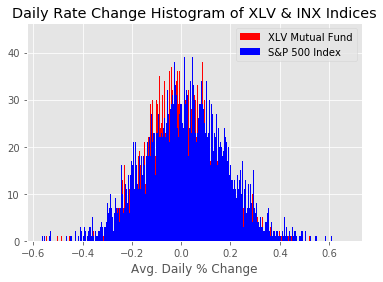

In [6]:
plt.style.use('ggplot')
plt.hist(xlv_avg_percent_moves, bins = 500, color = 'red', label = 'XLV Mutual Fund');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500 Index');
plt.xlabel('Avg. Daily % Change');
plt.title('Daily Rate Change Histogram of XLV & INX Indices');
plt.legend();

In [9]:
# Calculate a z-stat, p-stat, and standard error for XLV sample and S&P500 benchmark
test_statistics.calculate_test_stats(xlv_avg_percent_moves, sp_avg_percent_moves)

 Z-stat; -0.0018309119428792536 
 P-Value: 0.49926957222238827 
 Standard Error: 0.00229590774087437


In [8]:
def cohen_d(xlv, sp500):

    diff_mean = xlv.mean() - sp500.mean()

    n_xlv = len(xlv)
    n_sp500 = len(sp500)
    var_xlv = xlv.var()
    var_sp500 = sp500.var()

    pooled_var = (n_xlv * var_xlv + n_sp500 * var_sp500) / (n_xlv + n_sp500)

    cod = diff_mean / np.sqrt(pooled_var)

    return cod

xlv_sp_cohen_d = cohen_d(xlv_df['day_pct_change'], sp_df['day_pct_change'])
print(f"XLV-S&P Cohen's D: {xlv_sp_cohen_d}")

XLV-S&P Cohen's D: -0.01880839942055637


### Gathering Johnson & Johnson API data and organizing into operable pandas DF

In [24]:
# Load JNJ data and add series with the calculations of daily percent change as well as overall percent change

jj_symbol = 'JNJ'
jj_df = asset_cleaner.clean_asset_data(jj_symbol)
jj_df.head()

,date,open,high,low,close,volume,day_pct_change,overall_pct_change
0,2019-12-12,141.32,142.06,140.7300,140.904,2249238.0,-0.294367,48.320000
1,2019-12-11,140.93,141.98,140.6300,140.980,6498780.0,0.035479,48.400000
2,2019-12-10,140.80,141.00,139.9100,139.990,5310334.0,-0.575284,47.357895
3,2019-12-09,140.39,140.81,140.0601,140.500,4240984.0,0.078353,47.894737
4,2019-12-06,139.46,141.58,139.4600,140.380,6640427.0,0.659687,47.768421


### Hypothesis Testing: Average Daily Returns (Johnson & Johnson - S&P 500)

##### H0: The daily avg percent change in the JNJ index fund is not different to that of the overall S&P 500
##### HA: The daily avg percent change in the JNJ index fund is different than the S&P 500

In [25]:
jj_avg_percent_moves = []

for i in range(5000):
    
    sample_jj = jj_df.sample(n = 50, random_state = i)
    jj_avg_percent_moves.append(sample_jj.day_pct_change.mean())


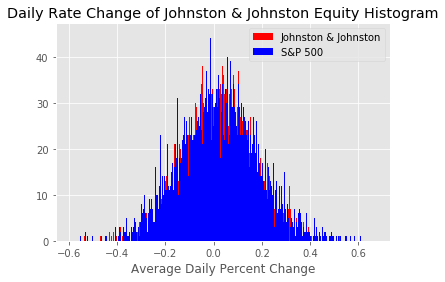

In [29]:
plt.style.use('ggplot')
plt.hist(jj_avg_percent_moves, bins = 500, color = 'red', label = 'Johnston & Johnston');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500');
plt.xlabel('Average Daily Percent Change')
plt.title('Daily Rate Change of Johnston & Johnston Equity Histogram')
# plt.hist(xlv_avg_percent_moves, bins = 500, color = 'pink', label = 'XLV');
plt.legend();  

In [28]:
test_statistics.calculate_test_stats(jj_avg_percent_moves, sp_avg_percent_moves)

 Z-stat; 0.00039900926405417016 
 P-Value: 0.5001591816614792 
 Standard Error: 0.00229590774087437


In [31]:
def cohen_d(xlv, sp500):

    diff_mean = xlv.mean() - sp500.mean()

    n_xlv = len(xlv)
    n_sp500 = len(sp500)
    var_xlv = xlv.var()
    var_sp500 = sp500.var()

    pooled_var = (n_xlv * var_xlv + n_sp500 * var_sp500) / (n_xlv + n_sp500)

    cod = diff_mean / np.sqrt(pooled_var)

    return cod

jj_sp_cohen_d = cohen_d(jj_df['day_pct_change'], sp_df['day_pct_change'])
print(f"JNJ-S&P Cohen's D: {jj_sp_cohen_d}")

JNJ-S&P Cohen's D: 0.003550696100159145
